### Imports & read data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error


In [2]:
%matplotlib inline

In [3]:
import xgboost as xgb

In [4]:
df = pd.read_csv('data/dataset.csv')

### Quick look at the dataset

In [5]:
df.sample(5)

,date,exchange rate,GDP,Inflation,Export,Import,GrossExtDebt,Interest Trend,GDP in $
269,2010-09-27,7.9094,298493.782609,6.986667,130584.304348,146923.347826,111322.782609,22.733333,37739.118341
101,2010-04-12,7.9265,221724.340659,4.590000,108346.340659,111332.890110,103138.989011,26.466667,27972.540296
1551,2014-04-01,10.9981,316905.000000,3.000000,151712.000000,162853.000000,137379.000000,77.000000,28814.522508
219,2010-08-08,7.8909,274091.065217,3.370968,127438.108696,134502.695652,107507.565217,21.774194,34735.082844
1185,2013-03-31,7.9930,304591.644444,0.100000,149618.022222,173324.188889,135822.544444,12.967742,38107.299443


### Set date as index

In [6]:
df['date'] = pd.to_datetime(df['date'])

In [7]:
df.set_index('date', inplace=True)

### Split dataset to train and test data

In [29]:
y = df['exchange rate']
X = df.drop(['exchange rate'], axis=1)

In [30]:
xgb_dmatrix = xgb.DMatrix(data=X, label=y)

In [31]:
X_train = X[X.index < pd.to_datetime('2017-08-01')]
y_train = y[y.index < pd.to_datetime('2017-08-01')]
X_test = X[X.index >= pd.to_datetime('2017-08-01')]
y_test = y[y.index >= pd.to_datetime('2017-08-01')]


In [32]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((2769, 7), (2769,), (234, 7), (234,))

In [33]:
regressor = xgb.XGBRegressor(objective='reg:linear', colsample_bytree=0.3, learning_rate=0.1, 
                              max_depth=4, n_estimators=1000)

In [37]:
regressor.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.3, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=4, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [38]:
y_pred = regressor.predict(X_test)


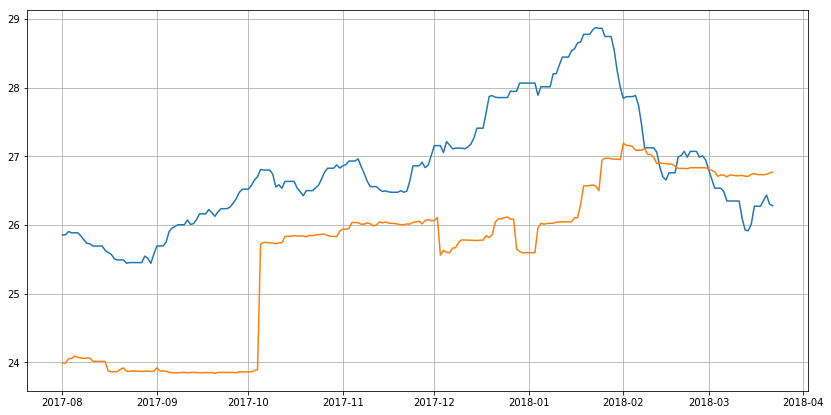

In [36]:
plt.figure(figsize=(14,7))
plt.grid(True)
plt.plot(y_test)
plt.plot(X_test.index, y_pred)